In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1
# a) & c)
Die algebraische Lösung von $f(x)$ lautet:
\begin{equation}
    f(x)=(x^3+ \frac{1}{3})-(x^3- \frac{1}{3}) = \frac{2}{3}
\end{equation}

In [21]:
x = np.linspace(-10**5,10**5,10**6)
k = np.zeros(10**6)
one = np.ones(10**6)
k += 2/3 #Array der algebraischen Lösung

In [3]:
def f(x):
    return (np.power(x,3)+1/3)-(np.power(x,3)-1/3)

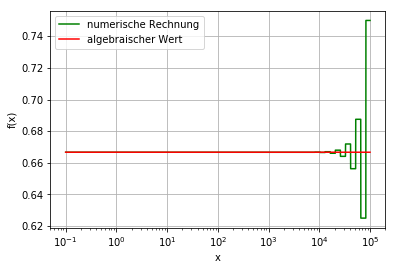

In [4]:
plt.plot(x,f(x),'g',label='numerische Rechnung')
plt.plot(x,k,'r',label='algebraischer Wert')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

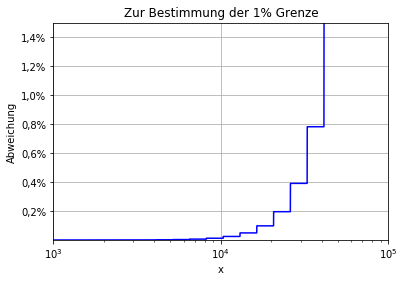

In [23]:
plt.plot(x,abs(f(x)/k-one),'b')#Abweichung der numerischen Lösung von der algebraischen
plt.ylim(0,0.015)
plt.xlim(10**3,10**5)
plt.xlabel('x')
plt.ylabel('Abweichung')
plt.xscale('log')
plt.grid()
plt.yticks([0.002,0.004,0.006,0.008,0.01,0.012,0.014],['0,2%','0,4%','0,6%','0,8%','1,0%','1,2%','1,4%'])
plt.title("Zur Bestimmung der 1% Grenze")
plt.show()

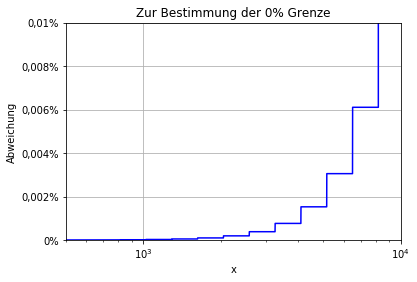

In [25]:
plt.plot(x,abs(f(x)/k-one),'b')
plt.ylim(0,0.0001)
plt.xlim(5*10**2,10**4)
plt.xlabel('x')
plt.ylabel('Abweichung')
plt.xscale('log')
plt.yticks([0,0.00002,0.00004,0.00006,0.00008,0.0001],['0%','0,002%','0,004%','0,006%','0,008%','0,01%'])
plt.title("Zur Bestimmung der 0% Grenze")
plt.grid()
plt.show()

Die Abweichung des numerischen Ergebnisses liegt im Bereich von ungefähr $|x|>4 \cdot 10^{-4}$ über 1% und für $|x|<10^{-3}$ bei 0%

# b) & c)
Die algebraische Lösung von $g(x)$ lautet:
\begin{equation}
    g(x)=((3+ \frac{x^3}{3})-(3- \frac{x^3}{3}))\cdot \frac{1}{x^3} = \frac{2}{3}
\end{equation}

In [7]:
def g(x):
    return (((3+np.power(x,3)/3)-(3-np.power(x,3)/3))/np.power(x,3))

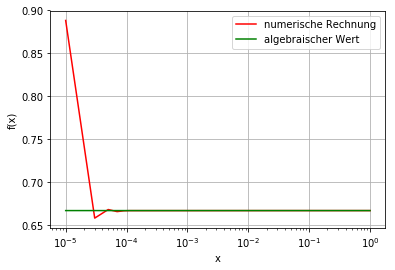

In [27]:
y = np.linspace(-1,1,10**5)
p = np.zeros(10**5)
one2 = np.ones(10**5)
p += 2/3 #Array der alegraischen Lösung
plt.clf()
plt.plot(y,g(y),'r',label='numerische Rechnung')
plt.plot(y,p,'g',label='algebraischer Wert')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

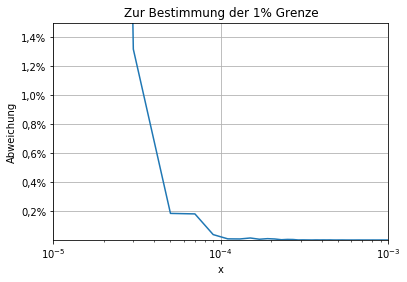

In [28]:
plt.plot(y,abs(g(y)/p-one2))
plt.grid()
plt.xlabel("x")
plt.ylabel("Abweichung")
plt.xscale("log")
plt.ylim(0,0.015)
plt.yticks([0.002,0.004,0.006,0.008,0.01,0.012,0.014],['0,2%','0,4%','0,6%','0,8%','1,0%','1,2%','1,4%'])
plt.title("Zur Bestimmung der 1% Grenze")
plt.xlim(10**-5,10**-3)
plt.show()

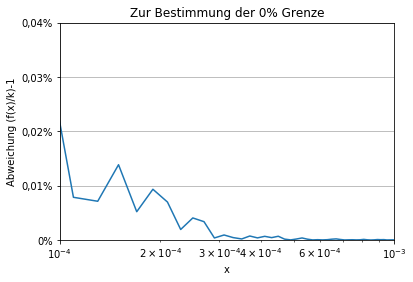

In [38]:
plt.plot(y,abs(g(y)/p-one2))
plt.grid()
plt.xlabel("x")
plt.ylabel("Abweichung "r'(f(x)/k)-1')
plt.xscale("log")
plt.title("Zur Bestimmung der 0% Grenze")
plt.yticks([0,0.0001,0.0002,0.0003,0.0004],['0%','0,01%','0,02%','0,03%','0,04%'])
plt.xlim(10**-4,10**-3)
plt.ylim(0,4*10**-4)
plt.show()

Die Abweichung des numerischen Ergebnisses ist im Bereich von ungefähr $|x|<2.5 \cdot 10^{-5}$ größer als 1 % und für $|x|>6 \cdot 10^{-4}$ gleich 0%

# Aufgabe 2

# a)
\begin{equation}
\frac{d\sigma}{d\Omega}= \frac{\alpha^2}{s}\left(\frac{2+\text{sin}^2(\theta)}{1-\beta^2\text{cos}^2(\theta)}\right)
\end{equation}

Die Gleichung ist numerisch nicht stabil, weil der Nenner $1-\beta^2\text{cos}^2(\Theta)$ Null werden kann.

Für $E_e=50GeV$ ist $\gamma = \frac{50 \cdot 10^9 eV}{511 \cdot 10^3 eV} = 97847.358$ und $\beta^2 = 1 - \gamma^{-2} = 0.9999999998955516.$ Also wird sich durch Rundung $\beta^2 = 1$ ergeben.

Somit wird $1-\beta^2\text{cos}^2(\theta) = 0$ für $\text{cos}^2(\theta)=1 \Rightarrow \theta =n \cdot \pi$ $(n \in \mathrm{N}$). Also sind in der Umgebung um diese Werte von $\theta$ Unstetigkeiten zu erwarten.

In [11]:
a = 7.297*10**(-3) #Feinstruckturkonstante
m_e = 511*10**3*1.602*10**(-19) #Masse
E_ver = 50*10**9*1.602*10**(-19) #Gegebene Energie

In [12]:
def w(E,x):
    return a/(2*E)**2*((2+np.sin(x)**2)/(1-(1-(m_e/E)**2)*np.cos(x)**2)) #Wirkungsquerschnitt

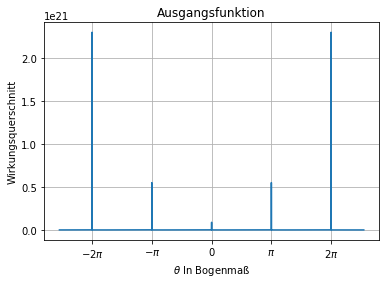

In [13]:
y = np.linspace(-10**(-7),10**(-7),10000)
y_pi = np.linspace(np.pi-10**-7,np.pi+10**-7,10000)
x = np.linspace(-8,8,10000)
plt.plot(x, w(E_ver,x))
plt.grid()
plt.xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],[r'$-2\pi$',r'$-\pi$',0,r'$\pi$',r'$2\pi$'])
plt.title('Ausgangsfunktion')
plt.xlabel(r'$\theta$'' In Bogenmaß')
plt.ylabel("Wirkungsquerschnitt")
plt.show()

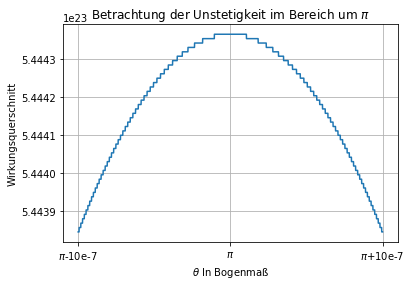

In [14]:
plt.plot(y_pi, w(50*10**9*1.602*10**(-19),y_pi))
plt.title('Betrachtung der Unstetigkeit im Bereich um 'r'$\pi$')
plt.xlabel(r'$\theta$'' In Bogenmaß')
plt.xticks([np.pi-10**-7,np.pi,np.pi+10**-7],[r'$\pi$-10e-7',r'$\pi$',r'$\pi$+10e-7'])
plt.grid()
plt.ylabel("Wirkungsquerschnitt")
plt.show()

Es ist, durch den "kastenförmigen" Verlauf der Kurve, eine klare Unstetigkeit im kleinen Bereich um $\theta = 0$ zu sehen

# b)

Durch umformen der Formel für den differentiellen Wirkungsquerschnitts soll die Unstetigkeit behoben werden.

Dafür bedienen wir uns der Gleichungen $1-\beta^2 = \frac{1}{\gamma^2} \text{ und } 1 = \text{sin}^2(\theta)+\text{cos}^2(\theta)$

Nach dem Einsetzen in die gegebene Formel erhalten wir:
\begin{equation}
    \frac{d\sigma}{d\Omega}= \frac{\alpha^2}{s}\left(\frac{2+\text{sin}^2(\theta)}{\text{sin}^2(\theta) + \text{cos}^2(\theta)\gamma^{-2}}\right)
\end{equation}
Weil die Summe im Nenner immer größer Null ist, kann der Nenner nicht mehr null werden, somit ist die Unstetigkeit beseitigt.

# c)

In [15]:
def w2(E,x):
    return a/(2*E)**2*((2+np.sin(x)**2)/(np.sin(x)**2+np.cos(x)**2*(m_e/E)**2))

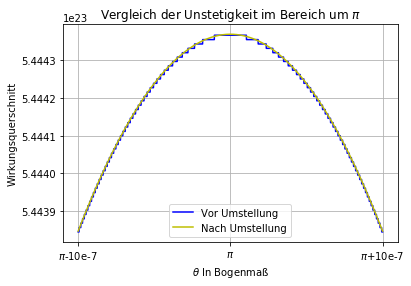

In [16]:
plt.plot(y_pi, w(E_ver,y_pi),'b',label='Vor Umstellung')
plt.plot(y_pi, w2(E_ver,y_pi),'y',label='Nach Umstellung')
plt.grid()
plt.xticks([np.pi-10**-7,np.pi,np.pi+10**-7],[r'$\pi$-10e-7',r'$\pi$',r'$\pi$+10e-7'])
plt.legend()
plt.title('Vergleich der Unstetigkeit im Bereich um 'r'$\pi$')
plt.xlabel(r'$\theta$'' In Bogenmaß')
plt.ylabel("Wirkungsquerschnitt")
plt.show()

Der glatte verlauf der Parabel im Bereich um $\theta=0$ für die umgetsellte Formel ist deutlich zu sehen. Somit wurde die Unstetigkeit beseitigt.

# d)

Eine Konditionszahl wird mit folgender Formel berechnet:
\begin{equation}
k = \frac{\delta f(x)}{\delta x} \cdot \frac{x}{f(x)}
\end{equation}
Wendet man diese auf die gegebene Funktion an, erhält man als Konditionszahl
\begin{equation}
k = \frac{(3\beta^2-1)\cdot \theta\cdot\text{sin}(2\theta)}{(\text{sin}^2(\theta)+2)(\beta^2\text{cos}(\theta)-1)}
\end{equation}

# e)

In [17]:
def kond(E,x):
    return ((((3*(1-(m_e/E)**2)-1)))*x*np.sin(2*x))/((np.sin(x)**2+2)*((1-(m_e/E)**2)*np.cos(x)-1))

In [18]:
def kond1(E,x):
    return -(2*x*np.sin(x)*np.cos(x)*((1-(m_e/E)**2)*np.sin(x)**2+(1-(m_e/E)**2)*np.cos(x)**2+2*(1-(m_e/E)**2)-1))/((np.sin(x)**2+2)*(1-(1-(m_e/E)**2)*np.cos(x)**2))

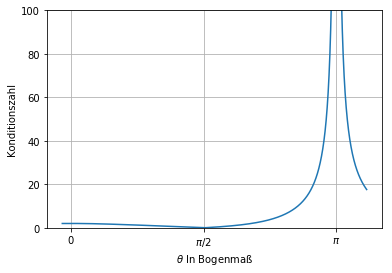

In [19]:
z = np.linspace(-0.1,3.5,10000)
z1 = np.linspace(-2,2,10000)

plt.plot(z,abs(kond1(E_ver,z)))
plt.ylim(0,100)
plt.xticks([0,np.pi/2,np.pi],[0,r'$\pi$/2',r'$\pi$'])
plt.grid()
plt.xlabel(r'$\theta$'' In Bogenmaß')
plt.ylabel('Konditionszahl')

plt.show()

Es ist deutlich zu sehen, dass die Funktion im Bereich der Unstetigkeiten $\theta = n \cdot \pi$ schlecht konditioniert ist, denn dort ist $|k| >> 1$.